<a href="https://colab.research.google.com/github/srimantmahapatra/srimant_code_repo_pub/blob/master/Online_Shoppers_Purchasing_Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## DataSet- https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

"""
Created on Thu Sep 10 2020

@author: Srimant Mahapatra
"""

'\nCreated on Thu Sep 10 2020\n\n@author: Srimant Mahapatra\n'

In [203]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
plt.style.use('ggplot')
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000
np.set_printoptions(threshold=np.inf)
plt.figure(figsize=(30, 30))


<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

In [4]:
df = pd.read_csv('/content/drive/My Drive/ML/online_shoppers_intention.csv')

In [5]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [168]:
df['Month']=pd.Categorical(df['Month'],['Feb', 'Mar','May','June', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'],ordered=True)

In [149]:
for col in df:
    if df[col].dtype != 'float64':
     print(col,df[col].dtype,df[col].sort_values().unique())

Administrative int64 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27]
Informational int64 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 24]
ProductRelated int64 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 186 187 188 189 190 191 192 193 194 195 197 198 19

In [10]:
df.groupby('VisitorType').size()

VisitorType
New_Visitor           1694
Other                   85
Returning_Visitor    10551
dtype: int64

In [11]:
df.groupby('Weekend').size()

Weekend
False    9462
True     2868
dtype: int64

In [229]:
df.groupby('Month',observed=True).size()

Month
Feb      184
Mar     1907
May     3364
June     288
Jul      432
Aug      433
Sep      448
Oct      549
Nov     2998
Dec     1727
dtype: int64

In [157]:
pd.pivot_table(df,index=['Month'],columns=['Weekend','VisitorType'],values='Administrative',aggfunc=pd.Series.count,margins_name='Total',margins=True)

Weekend           False                                True        \
VisitorType New_Visitor Other Returning_Visitor New_Visitor Other   
Month                                                               
Feb                 1.0   NaN             155.0         NaN   NaN   
Mar               141.0   NaN            1285.0        91.0   NaN   
May               234.0   NaN            2415.0        85.0   NaN   
June               24.0   1.0             216.0         6.0   NaN   
Jul                41.0   NaN             287.0        13.0   NaN   
Aug                48.0   NaN             289.0        24.0   NaN   
Sep                86.0   NaN             266.0        22.0   NaN   
Oct                84.0   NaN             321.0        40.0   NaN   
Nov               292.0  20.0            1895.0       127.0   2.0   
Dec               264.0  57.0            1040.0        71.0   5.0   
Total            1215.0  78.0            8169.0       479.0   7.0   

Weekend                        Total  
VisitorType Returning_Visitor         
Month                                 
Feb                      28.0    184  
Mar                     390.0   1907  
May                     630.0   3364  
June                     41.0    288  
Jul                      91.0    432  
Aug                      72.0    433  
Sep                      74.0    448  
Oct                     104.0    549  
Nov                     662.0   2998  
Dec                     290.0   1727  
Total                  2382.0  12330

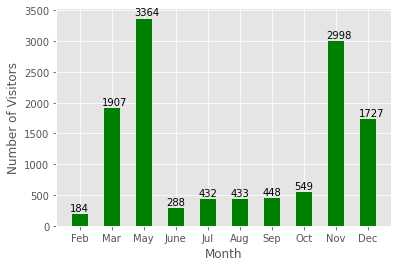

In [228]:
ind = [x for x, _ in enumerate(df['Month'].unique())]
width = 0.5       
plt.bar(ind, df.groupby('Month',observed=True).size(),width,color='green')
plt.xticks(ind,df['Month'].sort_values().unique())
for i, v in enumerate(df.groupby('Month',observed=True).size()):
  plt.text(ind[i] - 0.3, v + 50, str(v))

  plt.xlabel("Month")
  plt.ylabel("Number of Visitors")  
plt.show()


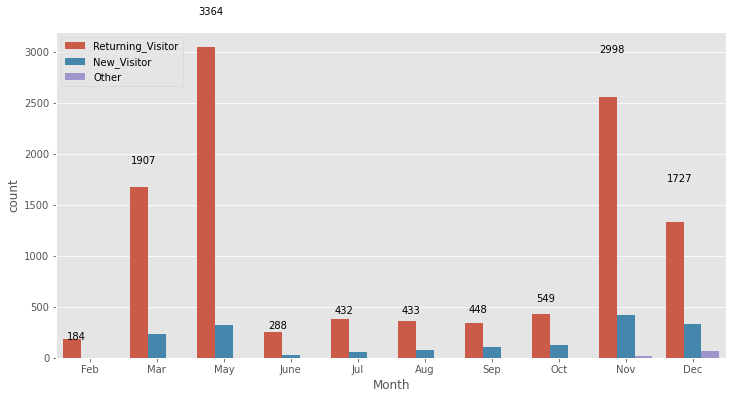

In [226]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ind = [x for x, _ in enumerate(df['Month'].unique())]
g= sns.countplot(x='Month',hue='VisitorType',data= df,ax=ax)
g.legend(loc=2)
for i, v in enumerate(df.groupby('Month',observed=True).size()):
    g.text(ind[i]-.2 ,v-.4,str(v),color='black', ha="center")